# <font color = lightcoral> Extending Agents 3 with Timeseries Data
>    
##### <font color = red> Testing High Precision Model --> 20240712_Transformers_Non_Overlapping_run_143_of_180.pt

**20240715_flask_app_model_change_v1.00.py**

> From transformer models
>

# <font color = red> Template Creation

## <font color = grey> Admin

In [1]:
import pandas as pd
import os
import gzip
import time
import warnings
import os
import shutil
from datetime import datetime
import time
# Set display option to show the full length of the column
pd.set_option('display.max_colwidth', None)
pd.set_option('display.max_rows', None)
pd.set_option('display.max_columns', None)
warnings.filterwarnings("ignore")

# Determine the base directory based on the effective user ID
if os.geteuid() == 0:  # root user
    base_dir = '/root'
else:
    base_dir = '/home/sagemaker-user'

# Set the environment variable
os.environ['BASE_DIR'] = base_dir

# Verify the base directory
print(f"Base directory set to: {base_dir}")

import warnings
warnings.simplefilter("ignore")


Base directory set to: /home/sagemaker-user


---

# <font color = lightsteelblue> 5 Key Files

In [2]:
# import pandas as pd
# import numpy as np
# import time

# data_dir = '/home/ubuntu/efs-w210-capstone-ebs/00.GabbleGrid/02.Local_Data_Files'

# # ################################## Part 1: Parsed Raw File ###################################

# # print("\n" + "*"*100)
# # print("********************** Part 1: Parsed Raw File ******************************************")
# # print("*"*100 + "\n")

# # parsed_file =  f"{data_dir}/01.BGL.log_structured.csv"
# # parsed_file_df = pd.read_csv(parsed_file)
# # display(parsed_file_df.head())
# # print("Shape of Parsed Raw File:", parsed_file_df.shape)

# ######################### Part 2: Encoded File with Feature for Model Training ######################

# print("\n" + "*"*100)
# print("********************** Part 2: Input Data with Features ******************************************")
# print("*"*100 + "\n")

# encoded_feature_input_file = f"{data_dir}/03.20240715_143154_orig_input_w_seq_info_FINAL.parquet"
# encoded_feature_input_file_df = pd.read_parquet(encoded_feature_input_file)
# display(encoded_feature_input_file_df.iloc[:, :25].head())
# print("Shape of Encoded File with Features:", encoded_feature_input_file_df.shape)

# ######################### Part 3: Orig Parquet File with 20 Event Columns (Most and Least used) Only for Mapping ######################

# print("\n" + "*"*100)
# print("********************** Part 3:  Orig Parquet File with 20 Event Columns (Most and Least used) Only for Mapping ******************************************")
# print("*"*100 + "\n")

# import pandas as pd

# # data_dir = '/home/ubuntu/efs-w210-capstone-ebs/00.GabbleGrid/02.Local_Data_Files'
# # Load the latest file
# latest_file = f"{data_dir}/03B.20240716_072206_orig_parquet_mapper_agents.parquet"
# latest_df = pd.read_parquet(latest_file)

# # Display the head of the final dataframe
# display(latest_df.head())
# display(latest_df.tail())

# print("Shape of File:", latest_df.shape)

# # ######################### Part 4: Encoded File where Train_Test = Test HEAD ###############################

# # print("\n" + "*"*100)
# # print("********************** Part 4: Test Set - HEAD *******************************")
# # print("*"*100 + "\n")

# # encoded_feature_input_test_df = encoded_feature_input_file_df[encoded_feature_input_file_df['Train_Test'] == 'Test']
# # display(encoded_feature_input_test_df.iloc[:, :25].head(10))
# # print("Shape of Encoded File where Train_Test = Test:", encoded_feature_input_test_df.shape)


# # ######################### Part 5: Encoded File where Train_Test = Test MIDDLE ###############################

# # # Part 4: Encoded File where Train_Test = Test (Records 100-200)
# # print("\n" + "*"*100)
# # print("********************** Part 5: Test Set - Records 100-200 *******************************")
# # print("*"*100 + "\n")


# # encoded_feature_input_test_df = encoded_feature_input_file_df[encoded_feature_input_file_df['Train_Test'] == 'Test']
# # display(encoded_feature_input_test_df.iloc[100:110, :25])
# # print("Shape of Encoded File where Train_Test = Test:", encoded_feature_input_test_df.shape)

# # ######################### Part 6: Encoded File where Train_Test = Test TAIL ###############################

# # print("\n" + "*"*100)
# # print("********************** Part 6: Test Set - TAIL *******************************")
# # print("*"*100 + "\n")

# # encoded_feature_input_test_df = encoded_feature_input_file_df[encoded_feature_input_file_df['Train_Test'] == 'Test']
# # display(encoded_feature_input_test_df.iloc[:, :25].tail(10))
# # print("Shape of Encoded File where Train_Test = Test:", encoded_feature_input_test_df.shape)


# # ######################### Part 7: Event_ID to Template Mapping #######################################

# # print("\n" + "*"*100)
# # print("********************** Part 7: Event_ID to Template Mapping ******************************************")
# # print("*"*100 + "\n")

# # eventid_template_file = f"{data_dir}/04.20240711_Template_to_EventID_Mapping_v1.00.csv"
# # eventid_template_df = pd.read_csv(eventid_template_file)
# # display(eventid_template_df.head())
# # print("Shape of Event_ID to Template Mapping:", eventid_template_df.shape)

# # ######################### Part 8: Event_ID to Encoding Mapping #######################################

# # print("\n" + "*"*100)
# # print("********************** Part 8: Event_ID to Encoding Mapping ******************************************")
# # print("*"*100 + "\n")

# # eventid_encoding_file = f"{data_dir}/05.20240711_EventID_to_EncodedInteger_Mapping_v1.00.csv"
# # eventid_encoding_df = pd.read_csv(eventid_encoding_file)
# # display(eventid_encoding_df.head())
# # print("Shape of Event_ID to Encoding Mapping:", eventid_encoding_df.shape)

# ######################### Part 9: Event_ID to Template Mapping #######################################

# print("\n" + "*"*100)
# print("********************** Part 9: Event_ID to Template Mapping ******************************************")
# print("*"*100 + "\n")

# eventid_encoding_file = f"{data_dir}/08.20240716031626_event_ID_int_template_mapping.csv"
# eventid_encoding_df = pd.read_csv(eventid_encoding_file)
# display(eventid_encoding_df.head())
# print("Shape of Event_ID to Encoding Mapping:", eventid_encoding_df.shape)

# # ######################### Part 10: First Two Records from X_test and y_test #######################

# # print("\n" + "*"*100)
# # print("********************** Part 10: First Two Records from X_test and y_test *****************************")
# # print("*"*100 + "\n")

# # file_prefix = "06.20240714_062624_non_overlap_full_test"  # Replace with your actual file prefix

# # # Load the test data
# # X_test = np.load(f"{data_dir}/{file_prefix}_X_test.npy")
# # y_test = np.load(f"{data_dir}/{file_prefix}_y_test.npy")

# # # Convert the first two records to DataFrames for better display
# # X_test_first_two = pd.DataFrame(X_test[:2].reshape(-1, X_test.shape[2]))
# # y_test_first_two = pd.DataFrame(y_test[:2], columns=['Actual'])

# # # Display the first two records
# # print("First two records from X_test:")
# # display(X_test_first_two)

# # print("\nFirst two records from y_test:")
# # display(y_test_first_two)

___
# <font color = red> Agent 3 Inference: TERTIARY --> DONE
## Map EventID integers to Template Text and add 2 new columns for tacking

### <font color = grey> This agent will then work with Agents 1 & 2 as needed

### <font color = blue>CURRENT

In [3]:
# import requests
# import numpy as np
# import pandas as pd
# import matplotlib.pyplot as plt
# import seaborn as sns
# from sklearn.metrics import confusion_matrix, precision_score, recall_score, accuracy_score, f1_score
# from datetime import datetime
# import re
# import torch

# # Parameters
# data_dir = '/home/ubuntu/efs-w210-capstone-ebs/00.GabbleGrid/02.Local_Data_Files'
# save_dir = '/home/ubuntu/efs-w210-capstone-ebs/00.GabbleGrid/03.Local_Inference_Eval_Files'
# file_prefix = "06.20240714_062624_non_overlap_full_test"  # Replace with your actual file prefix

# # Model parameters
# max_events = 5  # Set your actual max_events
# input_length = 30  # Set your actual input_length
# gap = 2  # Set your actual gap
# prediction_period = 1  # Set your actual prediction_period

# # Other parameters
# start_time = '2005-11-08 18:50:00'  # seq 11624
# num_tests = 130

# # Define the number of records for each test run (input_length + gap + prediction_period)
# num_records_per_test = input_length + gap + prediction_period

# # Load the test data
# X_test = np.load(f"{data_dir}/{file_prefix}_X_test.npy")
# y_test = np.load(f"{data_dir}/{file_prefix}_y_test.npy")

# print(f"X_test shape: {X_test.shape}")
# print(f"y_test shape: {y_test.shape}")

# # Load the original parquet file with sequence mapping
# input_file = f"{data_dir}/03.20240715_143154_orig_input_w_seq_info_FINAL.parquet"
# original_df = pd.read_parquet(input_file)

# # Ensure Seq_Num is integer for proper merging
# original_df['Seq_Num'] = original_df['Seq_Num'].astype(int)

# # Filter the test dataset based on the specified start time
# filtered_df = original_df[(original_df['Train_Test'] == 'Test') & (original_df['time_start'] == start_time)]
# if filtered_df.empty:
#     start_date = pd.to_datetime(start_time).date()
#     same_date_df = original_df[(original_df['Train_Test'] == 'Test') & (pd.to_datetime(original_df['time_start']).dt.date == start_date)]
#     if not same_date_df.empty:
#         available_times = same_date_df['time_start'].unique().tolist()
#         print(f"Error: start_time {start_time} not found in the dataset. Available times on {start_date} are: {available_times}")
#     all_times_df = original_df[original_df['Train_Test'] == 'Test']
#     all_times_df['time_start'] = pd.to_datetime(all_times_df['time_start'])
#     nearest_time = all_times_df.iloc[(all_times_df['time_start'] - pd.to_datetime(start_time)).abs().argsort()[:1]]['time_start'].values[0]
#     print(f"Error: start_time {start_time} not found in the dataset. The nearest available time is: {nearest_time}")
#     exit()

# start_seq_num = int(filtered_df['Seq_Num'].values[0])
# max_end_seq_num = int(original_df[original_df['Train_Test'] == 'Test']['Seq_Num'].max())
# expected_end_seq_num = start_seq_num + num_tests * num_records_per_test - 1

# if expected_end_seq_num > max_end_seq_num:
#     max_allowed_runs = (max_end_seq_num - start_seq_num + 1) // num_records_per_test
#     print(f"Number of test runs exceeds the maximum allowed ({max_allowed_runs}). Setting num_tests to {max_allowed_runs}.")
#     num_tests = max_allowed_runs
#     expected_end_seq_num = start_seq_num + num_tests * num_records_per_test - 1

# # Calculate the correct start and end sequence numbers for X_test and y_test
# start_index_x_test = (start_seq_num - original_df[original_df['Train_Test'] == 'Test']['Seq_Num'].min()) // num_records_per_test
# end_index_x_test = min(start_index_x_test + num_tests, len(X_test))

# # Use the prepare_data_for_model function to process the test data
# def prepare_data_for_model(X_test, start_seq_num, num_records_per_test, num_tests, original_df, max_events):
#     start_index_x_test = (start_seq_num - original_df[original_df['Train_Test'] == 'Test']['Seq_Num'].min()) // num_records_per_test
#     end_index_x_test = min(start_index_x_test + num_tests, len(X_test))
#     X_test_limited = X_test[start_index_x_test:end_index_x_test]
#     X_test_limited = X_test_limited[:, :, 1:max_events + 16]  # Adjust to max_events + 15 other features + 1
#     X_test_tensor = torch.tensor(X_test_limited, dtype=torch.float32)
#     return X_test_tensor, start_index_x_test, end_index_x_test

# X_test_tensor, start_index_x_test, end_index_x_test = prepare_data_for_model(X_test, start_seq_num, num_records_per_test, num_tests, original_df, max_events)

# print(f"X_test shape after adjusting columns: {X_test_tensor.shape}")

# # Prepare the data for the request
# data = {
#     'X_test': X_test_tensor.tolist(),
#     'input_length': input_length,
#     'gap': gap,
#     'prediction_period': prediction_period,
#     'max_events': max_events
# }

# # Send a request to the server
# response = requests.post('http://0.0.0.0:5000/predict', json=data)

# # Print the raw response text for debugging
# print("Raw response text:", response.text)

# # Attempt to parse the response as JSON
# try:
#     response_data = response.json()
# except ValueError as e:
#     print("Failed to parse JSON response:", e)
#     response_data = {}

# # Verify the response keys
# print("Response keys:", response_data.keys())

# # Process the response if it's valid
# if 'predictions' in response_data:
#     predictions = np.array(response_data['predictions']).flatten()

#     # Print first 10 predictions and actual labels
#     print("First 10 predictions:", predictions[:10])
#     print("First 10 actual labels:", y_test[start_index_x_test:end_index_x_test][:10])

#     # Create DataFrame for tracking and merging with additional information
#     tracking_data = []

#     for i in range(num_tests):
#         total_seq_start = start_seq_num + i * num_records_per_test
#         total_seq_end = total_seq_start + num_records_per_test - 1
#         source_seq_start = total_seq_start
#         source_seq_end = source_seq_start + input_length - 1
#         gap_seq_start = source_seq_end + 1
#         gap_seq_end = gap_seq_start + gap - 1
#         prediction_seq_start = total_seq_end - prediction_period + 1
#         prediction_seq_end = total_seq_end
        
#         tracking_data.append([
#             total_seq_start, total_seq_end, source_seq_start, source_seq_end,
#             gap_seq_start, gap_seq_end, prediction_seq_start, prediction_seq_end,
#             predictions[i], y_test[start_index_x_test + i],
#             str(original_df[original_df['Seq_Num'] == source_seq_start]['time_start'].values[0])
#         ])

#     tracking_df = pd.DataFrame(tracking_data, columns=[
#         "Total_Seq_Start", "Total_Seq_End", "Source_Seq_Start", "Source_Seq_End",
#         "Gap_Seq_Start", "Gap_Seq_End", "Prediction_Seq_Start", "Prediction_Seq_End",
#         "Predicted", "Actual", "time_start"
#     ])

#     # Display the first 30 columns of the new DataFrame
#     pd.set_option('display.max_columns', 50)
#     print("\nEnhanced Results:")
#     print(tracking_df.head())

#     # Define the timestamp
#     timestamp = datetime.now().strftime('%Y%m%d%H%M%S')

#     # Save the consolidated DataFrame to the specified location
#     final_file = f"{save_dir}/03B.{timestamp}_agent1_non_overlap_model2_consl.csv"
#     tracking_df.to_csv(final_file, index=False)

#     print(f"Final file with consolidated columns saved to: {final_file}")

#     # Calculate metrics
#     conf_matrix = confusion_matrix(y_test[start_index_x_test:end_index_x_test], predictions, labels=[0, 1])
#     precision = precision_score(y_test[start_index_x_test:end_index_x_test], predictions, zero_division=0)
#     recall = recall_score(y_test[start_index_x_test:end_index_x_test], predictions, zero_division=0)
#     accuracy = accuracy_score(y_test[start_index_x_test:end_index_x_test], predictions)
#     f1 = f1_score(y_test[start_index_x_test:end_index_x_test], predictions, zero_division=0)

#     # Check if the confusion matrix has the expected shape
#     if conf_matrix.size == 4:
#         tn, fp, fn, tp = conf_matrix.ravel()
#     else:
#         tn = conf_matrix[0, 0] if conf_matrix.shape[0] > 0 else 0
#         fp = conf_matrix[0, 1] if conf_matrix.shape[1] > 1 else 0
#         fn = conf_matrix[1, 0] if conf_matrix.shape[0] > 1 else 0
#         tp = conf_matrix[1, 1] if conf_matrix.shape[1] > 1 else 0

#     # Create a DataFrame for metrics
#     metrics_df = pd.DataFrame({
#         'Metric': ['Accuracy', 'Precision (Class 1)', 'Recall (Class 1)', 'F1 Score', 'True Positives', 'False Positives', 'True Negatives', 'False Negatives'],
#         'Value': [accuracy, precision, recall, f1, tp, fp, tn, fn]
#     })

#     # Print metrics DataFrame
#     print("\nMetrics:")
#     print(metrics_df)

#     # Plot the confusion matrix
#     plt.figure(figsize=(10, 7))
#     sns.heatmap(conf_matrix, annot=True, fmt='d', cmap='Blues', cbar=False,
#                 xticklabels=['Predicted 0', 'Predicted 1'], yticklabels=['Actual 0', 'Actual 1'])
#     plt.xlabel('Predicted')
#     plt.ylabel('Actual')
#     plt.title('Confusion Matrix')
#     plt.show()

#     # Additional text mapping functionality
#     # Convert Source_Seq_Start to integer for proper merging
#     tracking_df['Source_Seq_Start'] = tracking_df['Source_Seq_Start'].astype(int)

#     # Load the master tracking file
#     master_tracking_file = f"{data_dir}/03B.20240716_072206_orig_parquet_mapper_agents.parquet"
#     master_tracking_df = pd.read_parquet(master_tracking_file)

#     # Check the columns of master_tracking_df before merging
#     print("Columns in master_tracking_df:", master_tracking_df.columns)

#     # Ensure 'time_start' column exists in master_tracking_df
#     if 'time_start' not in master_tracking_df.columns:
#         print("Warning: 'time_start' column not found in master_tracking_df. Please check the master tracking file.")
#         master_tracking_df['time_start'] = pd.NaT  # Fill with NaT (Not a Time) if missing

#     # Merge with original data to get necessary columns
#     merged_df = tracking_df.merge(master_tracking_df, left_on='Source_Seq_Start', right_on='Seq_Num', how='left')

#     # Print the columns of the merged dataframe to verify the merge
#     print("Columns in merged_df after merge:", merged_df.columns)

#     # Retain only necessary columns
#     columns_to_keep = [
#         "Total_Seq_Start", "Total_Seq_End", "Source_Seq_Start", "Source_Seq_End",
#         "Gap_Seq_Start", "Gap_Seq_End", "Prediction_Seq_Start", "Prediction_Seq_End",
#         "Predicted", "Actual", "Seq_Num", "Train_Test", "time_start_y", "time_start_int",
#         "Class", "unique_events", "most_frequent_event", "transitions", "entropy",
#         "hour_of_day", "day_of_week", "event_count", "top_event_frequency",
#         "prev_event_count", "transition_rate", "high_transition_rate", "prev_entropy",
#         "entropy_change", "rolling_event_count", "rolling_unique_event_count"
#     ]

#     # Check if all columns to keep are in the merged dataframe
#     missing_columns = [col for col in columns_to_keep if col not in merged_df.columns]
#     if missing_columns:
#         print(f"Warning: The following columns are missing from merged_df: {missing_columns}")

#     # Adjust for renamed columns
#     columns_to_keep = [col if col != 'time_start' else 'time_start_y' for col in columns_to_keep]

#     filtered_df = merged_df[columns_to_keep]

#     # Load event ID to template mapping file
#     eventid_encoding_file = f"{data_dir}/08.20240716031626_event_ID_int_template_mapping.csv"
#     eventid_encoding_df = pd.read_csv(eventid_encoding_file)

#     # Create a dictionary for quick lookup
#     eventid_to_template = dict(zip(eventid_encoding_df['EncodedValue'], eventid_encoding_df['EventTemplate']))

#     # Function to consolidate events and map to templates
#     def clean_text(text):
#         # Remove unnecessary characters like <*>, <, and >
#         text = re.sub(r'<\*?>', '', text)
#         text = text.replace('<', '').replace('>', '')
#         return text

#     def consolidate_events_to_text(df, start_col, end_col, col_name):
#         consolidated = []
#         for i, row in df.iterrows():
#             seen_events = set()
#             events = []
#             for seq_num in range(row[start_col], row[end_col] + 1):
#                 event_list = master_tracking_df[master_tracking_df['Seq_Num'] == seq_num][col_name].astype(str).tolist()
#                 for event in event_list:
#                     for e in event.split(', '):
#                         if e not in seen_events:
#                             seen_events.add(e)
#                             if int(e) in eventid_to_template:
#                                 cleaned_text = clean_text(eventid_to_template[int(e)])
#                                 events.append(f'"{cleaned_text}"')
#                             else:
#                                 events.append('"Unknown"')
#             consolidated.append(', '.join(events))
#         return consolidated

#     # Add the new columns
#     filtered_df['runtime_most_frequent_consl_text'] = consolidate_events_to_text(filtered_df, 'Source_Seq_Start', 'Source_Seq_End', 'most_frequent_event')
#     filtered_df['runtime_least_frequent_consl_text'] = consolidate_events_to_text(filtered_df, 'Source_Seq_Start', 'Source_Seq_End', 'most_frequent_event')

#     # Display the head and tail of the final dataframe
#     display(filtered_df.head())
#     display(filtered_df.tail())

#     # Define the timestamp
#     timestamp = datetime.now().strftime('%Y%m%d%H%M%S')

#     # Save the consolidated DataFrame to the specified location
#     final_file = f"{save_dir}/03B.{timestamp}_agent3_non_overlap_model2_consl.csv"
#     filtered_df.to_csv(final_file, index=False)

#     print(f"Final file with consolidated columns saved to: {final_file}")

# else:
#     print("No predictions found in the response.")

### <font color = blue> Reconciliation of Numbers after Merging the DFs

In [4]:
# import pandas as pd
# from sklearn.metrics import confusion_matrix, precision_score, recall_score, accuracy_score, f1_score
# import matplotlib.pyplot as plt
# import seaborn as sns

# # Calculate metrics
# conf_matrix = confusion_matrix(filtered_df['Actual'], filtered_df['Predicted'], labels=[0, 1])
# precision = precision_score(filtered_df['Actual'], filtered_df['Predicted'], zero_division=0)
# recall = recall_score(filtered_df['Actual'], filtered_df['Predicted'], zero_division=0)
# accuracy = accuracy_score(filtered_df['Actual'], filtered_df['Predicted'])
# f1 = f1_score(filtered_df['Actual'], filtered_df['Predicted'], zero_division=0)

# # Check if the confusion matrix has the expected shape
# if conf_matrix.size == 4:
#     tn, fp, fn, tp = conf_matrix.ravel()
# else:
#     # Handle cases with fewer than two classes in the confusion matrix
#     tn = conf_matrix[0, 0] if conf_matrix.shape[0] > 0 else 0
#     fp = conf_matrix[0, 1] if conf_matrix.shape[1] > 1 else 0
#     fn = conf_matrix[1, 0] if conf_matrix.shape[0] > 1 else 0
#     tp = conf_matrix[1, 1] if conf_matrix.shape[1] > 1 else 0

# # Create a DataFrame for metrics
# metrics_df = pd.DataFrame({
#     'Metric': ['Accuracy', 'Precision (Class 1)', 'Recall (Class 1)', 'F1 Score', 'True Positives', 'False Positives', 'True Negatives', 'False Negatives'],
#     'Value': [accuracy, precision, recall, f1, tp, fp, tn, fn]
# })

# # Print metrics DataFrame
# print("\nMetrics:")
# print(metrics_df)

# # Plot the confusion matrix
# plt.figure(figsize=(10, 7))
# sns.heatmap(conf_matrix, annot=True, fmt='d', cmap='Blues', cbar=False,
#             xticklabels=['Predicted 0', 'Predicted 1'], yticklabels=['Actual 0', 'Actual 1'])
# plt.xlabel('Predicted')
# plt.ylabel('Actual')
# plt.title('Confusion Matrix')
# plt.show()

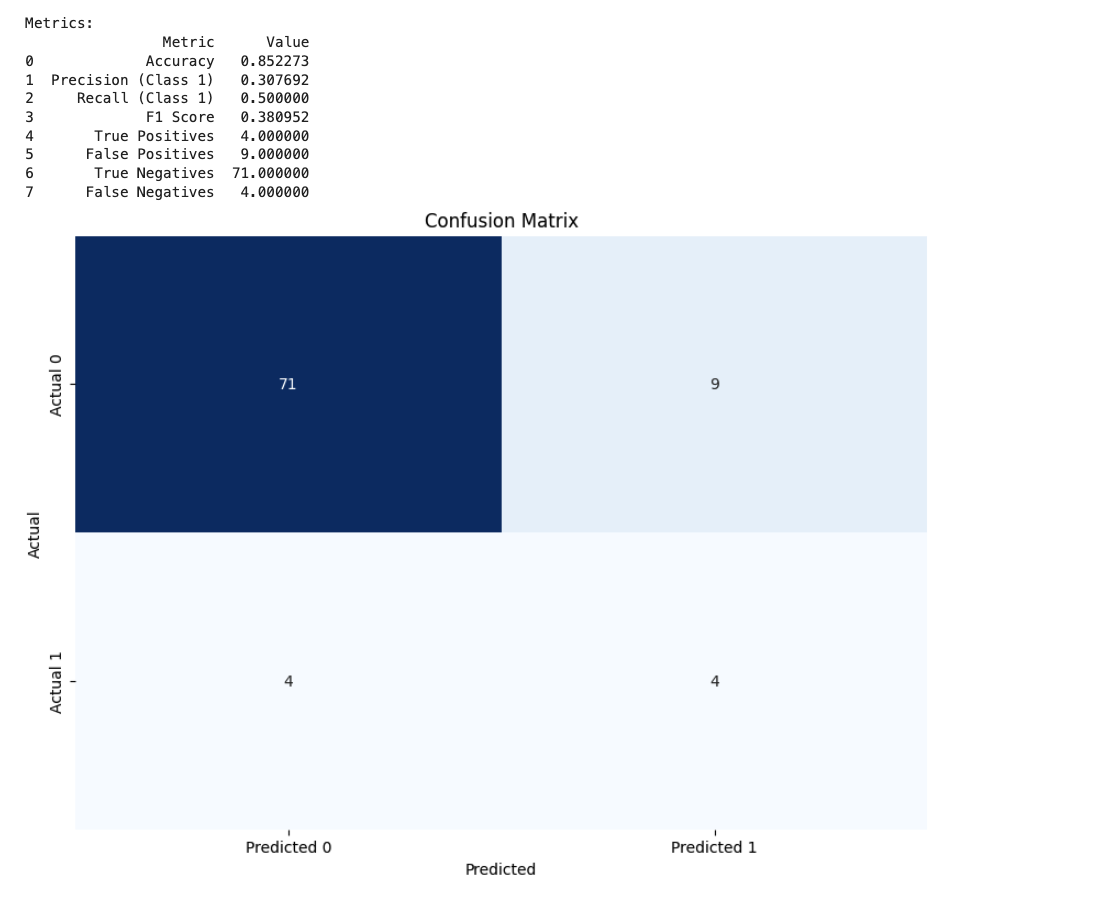

---

# <font color = red> Template Prep
## <font color = blue> Generate Scenarios
### <font color = green> Dry Run - Sample for Validation

---

In [5]:
import requests
import numpy as np
import pandas as pd
import torch
from sklearn.metrics import confusion_matrix, precision_score, recall_score, accuracy_score, f1_score
from datetime import datetime
import re
import os

# Parameters
data_dir = '/home/ubuntu/efs-w210-capstone-ebs/00.GabbleGrid/02.Local_Data_Files'
save_dir = '/home/ubuntu/efs-w210-capstone-ebs/00.GabbleGrid/project/admin/01.Templates'
file_prefix = "06.20240714_062624_non_overlap_full_test"

# Model parameters
max_events = 5
input_length = 30
gap = 2
prediction_period = 1

# Other parameters
start_time = '2005-11-08 18:50:00'
num_tests = 130

# Define the number of records for each test run (input_length + gap + prediction_period)
num_records_per_test = input_length + gap + prediction_period

# Load the test data
X_test = np.load(f"{data_dir}/{file_prefix}_X_test.npy")
y_test = np.load(f"{data_dir}/{file_prefix}_y_test.npy")

# # print("\n" + "*"*100)
# # print("********************** Part 1: Parsed Raw File ******************************************")
# # print("*"*100 + "\n")

print("\n" + "*"*100)
print(f"X_test shape: {X_test.shape}")
print(f"y_test shape: {y_test.shape}")
print("\n" + "*"*100)

# Load the original parquet file with sequence mapping
input_file = f"{data_dir}/03.20240715_143154_orig_input_w_seq_info_FINAL.parquet"
original_df = pd.read_parquet(input_file)

# Ensure Seq_Num is integer for proper merging
original_df['Seq_Num'] = original_df['Seq_Num'].astype(int)

# Filter the test dataset based on the specified start time
filtered_df = original_df[(original_df['Train_Test'] == 'Test') & (original_df['time_start'] == start_time)]
if filtered_df.empty:
    start_date = pd.to_datetime(start_time).date()
    same_date_df = original_df[(original_df['Train_Test'] == 'Test') & (pd.to_datetime(original_df['time_start']).dt.date == start_date)]
    if not same_date_df.empty:
        available_times = same_date_df['time_start'].unique().tolist()
        print(f"Error: start_time {start_time} not found in the dataset. Available times on {start_date} are: {available_times}")
    all_times_df = original_df[original_df['Train_Test'] == 'Test']
    all_times_df['time_start'] = pd.to_datetime(all_times_df['time_start'])
    nearest_time = all_times_df.iloc[(all_times_df['time_start'] - pd.to_datetime(start_time)).abs().argsort()[:1]]['time_start'].values[0]
    print(f"Error: start_time {start_time} not found in the dataset. The nearest available time is: {nearest_time}")
    exit()

start_seq_num = int(filtered_df['Seq_Num'].values[0])
max_end_seq_num = int(original_df[original_df['Train_Test'] == 'Test']['Seq_Num'].max())
expected_end_seq_num = start_seq_num + num_tests * num_records_per_test - 1

if expected_end_seq_num > max_end_seq_num:
    max_allowed_runs = (max_end_seq_num - start_seq_num + 1) // num_records_per_test
    print(f"Number of test runs exceeds the maximum allowed ({max_allowed_runs}). Setting num_tests to {max_allowed_runs}.")
    num_tests = max_allowed_runs
    expected_end_seq_num = start_seq_num + num_tests * num_records_per_test - 1

# Calculate the correct start and end sequence numbers for X_test and y_test
start_index_x_test = (start_seq_num - original_df[original_df['Train_Test'] == 'Test']['Seq_Num'].min()) // num_records_per_test
end_index_x_test = min(start_index_x_test + num_tests, len(X_test))

# Use the prepare_data_for_model function to process the test data
def prepare_data_for_model(X_test, start_seq_num, num_records_per_test, num_tests, original_df, max_events):
    start_index_x_test = (start_seq_num - original_df[original_df['Train_Test'] == 'Test']['Seq_Num'].min()) // num_records_per_test
    end_index_x_test = min(start_index_x_test + num_tests, len(X_test))
    X_test_limited = X_test[start_index_x_test:end_index_x_test]
    X_test_limited = X_test_limited[:, :, 1:max_events + 16]
    X_test_tensor = torch.tensor(X_test_limited, dtype=torch.float32)
    return X_test_tensor, start_index_x_test, end_index_x_test

X_test_tensor, start_index_x_test, end_index_x_test = prepare_data_for_model(X_test, start_seq_num, num_records_per_test, num_tests, original_df, max_events)

print("\n" + "*"*100)
print(f"X_test shape after adjusting columns: {X_test_tensor.shape}")
print("\n" + "*"*100)

# Prepare the data for the request
data = {
    'X_test': X_test_tensor.tolist(),
    'input_length': input_length,
    'gap': gap,
    'prediction_period': prediction_period,
    'max_events': max_events
}

# Send a request to the server
response = requests.post('http://0.0.0.0:5000/predict', json=data)

# Print the raw response text for debugging
print("Raw response text:", response.text)

# Attempt to parse the response as JSON
try:
    response_data = response.json()
except ValueError as e:
    print("Failed to parse JSON response:", e)
    response_data = {}

print("\n" + "*"*100)
# Verify the response keys
print("Response keys:", response_data.keys())
# print("\n" + "*"*100)

# Process the response if it's valid
if 'predictions' in response_data:
    predictions = np.array(response_data['predictions']).flatten()
    model_name = response_data.get('model_name', 'unknown_model')

    # Print first 10 predictions and actual labels
    print("\n" + "*"*100)
    print("First 10 predictions:", predictions[:10])
    print("\n" + "*"*100)
    print("First 10 actual labels:", y_test[start_index_x_test:end_index_x_test][:10])
    # print("\n" + "*"*100)

    # Create DataFrame for tracking and merging with additional information
    tracking_data = []

    for i in range(num_tests):
        total_seq_start = start_seq_num + i * num_records_per_test
        total_seq_end = total_seq_start + num_records_per_test - 1
        source_seq_start = total_seq_start
        source_seq_end = source_seq_start + input_length - 1
        gap_seq_start = source_seq_end + 1
        gap_seq_end = gap_seq_start + gap - 1
        prediction_seq_start = total_seq_end - prediction_period + 1
        prediction_seq_end = total_seq_end
        
        tracking_data.append([
            total_seq_start, total_seq_end, source_seq_start, source_seq_end,
            gap_seq_start, gap_seq_end, prediction_seq_start, prediction_seq_end,
            predictions[i], y_test[start_index_x_test + i],
            str(original_df[original_df['Seq_Num'] == source_seq_start]['time_start'].values[0])
        ])

    tracking_df = pd.DataFrame(tracking_data, columns=[
        "Total_Seq_Start", "Total_Seq_End", "Source_Seq_Start", "Source_Seq_End",
        "Gap_Seq_Start", "Gap_Seq_End", "Prediction_Seq_Start", "Prediction_Seq_End",
        "Predicted", "Actual", "time_start"
    ])

    # Calculate metrics
    conf_matrix = confusion_matrix(y_test[start_index_x_test:end_index_x_test], predictions, labels=[0, 1])
    precision = precision_score(y_test[start_index_x_test:end_index_x_test], predictions, zero_division=0)
    recall = recall_score(y_test[start_index_x_test:end_index_x_test], predictions, zero_division=0)
    accuracy = accuracy_score(y_test[start_index_x_test:end_index_x_test], predictions)
    f1 = f1_score(y_test[start_index_x_test:end_index_x_test], predictions, zero_division=0)

    # Check if the confusion matrix has the expected shape
    if conf_matrix.size == 4:
        tn, fp, fn, tp = conf_matrix.ravel()
    else:
        tn = conf_matrix[0, 0] if conf_matrix.shape[0] > 0 else 0
        fp = conf_matrix[0, 1] if conf_matrix.shape[1] > 1 else 0
        fn = conf_matrix[1, 0] if conf_matrix.shape[0] > 1 else 0
        tp = conf_matrix[1, 1] if conf_matrix.shape[1] > 1 else 0

    # Create a DataFrame for metrics
    timestamp = datetime.now().strftime('%Y%m%d%H%M%S')
    metrics_data = {
        'Experiment': [timestamp] * num_tests,  # Using timestamp as the experiment number
        'Sample': list(range(1, num_tests + 1)),
        'Max_Events': [max_events] * num_tests,
        'Input_Length': [input_length] * num_tests,
        'Gap': [gap] * num_tests,
        'Prediction_Period': [prediction_period] * num_tests,
        'Exp_Start_Time': [start_time] * num_tests,
        'Num_Tests': [num_tests] * num_tests,
        'Model_Name': [model_name] * num_tests,
        'Precision': [precision] * num_tests,
        'Recall': [recall] * num_tests,
        'Accuracy': [accuracy] * num_tests,
        'F1_Score': [f1] * num_tests,
        'TN': [tn] * num_tests,
        'FP': [fp] * num_tests,
        'FN': [fn] * num_tests,
        'TP': [tp] * num_tests
    }
    metrics_df = pd.DataFrame(metrics_data)

    # Combine tracking_df and metrics_df
    combined_df = pd.concat([metrics_df, tracking_df], axis=1)

    # Load the master tracking file
    master_tracking_file = f"{data_dir}/03B.20240716_072206_orig_parquet_mapper_agents.parquet"
    master_tracking_df = pd.read_parquet(master_tracking_file)

    # Merge with original data to get necessary columns
    merged_df = combined_df.merge(master_tracking_df, left_on='Source_Seq_Start', right_on='Seq_Num', how='left')

    # Rename the 'time_start_y' column to 'Sample_Start_Time'
    merged_df.rename(columns={'time_start_y': 'Sample_Start_Time'}, inplace=True)


    # Retain only necessary columns
    columns_to_keep = [
        "Experiment", "Sample", "Max_Events", "Input_Length", "Gap", "Prediction_Period",
        "Exp_Start_Time", "Num_Tests", "Model_Name", "Precision", "Recall", "Accuracy", "F1_Score", "TN", "FP", "FN", "TP",
        "Total_Seq_Start", "Total_Seq_End", "Source_Seq_Start", "Source_Seq_End", "Gap_Seq_Start",
        "Gap_Seq_End", "Prediction_Seq_Start", "Prediction_Seq_End", "Predicted", "Actual", "Sample_Start_Time",
        "Class", "unique_events", "most_frequent_event", "transitions", "entropy", "hour_of_day", "day_of_week",
        "event_count", "top_event_frequency", "prev_event_count", "transition_rate", "high_transition_rate",
        "prev_entropy", "entropy_change", "rolling_event_count", "rolling_unique_event_count"
    ]

    # Check if all columns to keep are in the merged dataframe
    missing_columns = [col for col in columns_to_keep if col not in merged_df.columns]
    if missing_columns:
        print(f"Warning: The following columns are missing from merged_df: {missing_columns}")

    # Adjust for renamed columns
    columns_to_keep = [col if col != 'time_start' else 'Sample_Start_Time' for col in columns_to_keep]

    filtered_df = merged_df[columns_to_keep]

    # Load event ID to template mapping file
    eventid_encoding_file = f"{data_dir}/08.20240716031626_event_ID_int_template_mapping.csv"
    eventid_encoding_df = pd.read_csv(eventid_encoding_file)

    # Create a dictionary for quick lookup
    eventid_to_template = dict(zip(eventid_encoding_df['EncodedValue'], eventid_encoding_df['EventTemplate']))

    # Function to consolidate events and map to templates
    def clean_text(text):
        # Remove unnecessary characters like <*>, <, and >
        text = re.sub(r'<\*?>', '', text)
        text = text.replace('<', '').replace('>', '')
        return text

    def consolidate_events_to_text(df, start_col, end_col, col_name):
        consolidated = []
        for i, row in df.iterrows():
            seen_events = set()
            events = []
            for seq_num in range(row[start_col], row[end_col] + 1):
                if col_name in master_tracking_df.columns:
                    event_list = master_tracking_df[master_tracking_df['Seq_Num'] == seq_num][col_name].astype(str).tolist()
                    for event in event_list:
                        for e in event.split(', '):
                            if e not in seen_events:
                                seen_events.add(e)
                                if int(e) in eventid_to_template:
                                    cleaned_text = clean_text(eventid_to_template[int(e)])
                                    events.append(f'"{cleaned_text}"')
                                else:
                                    events.append('"Unknown"')
            consolidated.append(', '.join(events))
        return consolidated

    # Add the new columns
    filtered_df['runtime_most_frequent_consl_text'] = consolidate_events_to_text(filtered_df, 'Source_Seq_Start', 'Source_Seq_End', 'most_frequent_event')
    filtered_df['runtime_least_frequent_consl_text'] = consolidate_events_to_text(filtered_df, 'Source_Seq_Start', 'Source_Seq_End', 'most_frequent_event')

    # Display the head and tail of the final dataframe

    # print("\n" + "*"*100)
    print("********************** Final Dataframe (Head) ******************************************")
    display(filtered_df.head(2))
    
    # print("\n" + "*"*100)
    print("********************** Final Dataframe (Tail) ******************************************")
    display(filtered_df.tail(2))
    # print("\n" + "*"*100)

    # Save the consolidated DataFrame to the specified location
    final_file = f"{save_dir}/A-Template_Detail.parquet"

    # Ensure 'Experiment' column is of integer type
    filtered_df['Experiment'] = filtered_df['Experiment'].astype(int)
    
    if os.path.exists(final_file):
        existing_df = pd.read_parquet(final_file)
        combined_final_df = pd.concat([existing_df, filtered_df])
        combined_final_df.to_parquet(final_file, index=False)
    else:
        filtered_df.to_parquet(final_file, index=False)
    
    # print("\n" + "*"*100)
    print(f"Final file with consolidated columns saved to: {final_file}")
    # print("\n" + "*"*100)

    # Load and display the contents of the saved parquet file
    saved_results = pd.read_parquet(final_file)
    # print("\n" + "*"*100)
    print("********************** Displaying the last 5 rows from  the saved parquet file (Tail)  ******************************************")
    display(saved_results.tail(5))
    print("\n" + "*"*100)

else:
    print("No predictions found in the response.")


****************************************************************************************************
X_test shape: (127, 20, 56)
y_test shape: (127,)

****************************************************************************************************
Number of test runs exceeds the maximum allowed (88). Setting num_tests to 88.

****************************************************************************************************
X_test shape after adjusting columns: torch.Size([88, 20, 20])

****************************************************************************************************
Raw response text: {"model_name":"20240712_Transformers_Non_Overlapping_run_13_of_180.pt","predictions":[0,0,0,0,1,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,1,0,0,0,1,1,0,0,0,0,0,0,1,0,0,0,0,0,1,1,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,1,0]}


****************************************************************************************************
Response keys: 

,Experiment,Sample,Max_Events,Input_Length,Gap,Prediction_Period,Exp_Start_Time,Num_Tests,Model_Name,Precision,Recall,Accuracy,F1_Score,TN,FP,FN,TP,Total_Seq_Start,Total_Seq_End,Source_Seq_Start,Source_Seq_End,Gap_Seq_Start,Gap_Seq_End,Prediction_Seq_Start,Prediction_Seq_End,Predicted,Actual,Sample_Start_Time,Class,unique_events,most_frequent_event,transitions,entropy,hour_of_day,day_of_week,event_count,top_event_frequency,prev_event_count,transition_rate,high_transition_rate,prev_entropy,entropy_change,rolling_event_count,rolling_unique_event_count,runtime_most_frequent_consl_text,runtime_least_frequent_consl_text
0,20240804070441,1,5,30,2,1,2005-11-08 18:50:00,88,20240712_Transformers_Non_Overlapping_run_13_of_180.pt,0.307692,0.5,0.852273,0.380952,71,9,4,4,11624,11656,11624,11653,11654,11655,11656,11656,0,0.0,2005-11-08 18:50:00,0,2,68,1,0.500402,18,1,10,35433,1.0,0.1,0,0.0,0.500402,17.0,13.0,"""ciod: generated core files for program "", ""CE sym , at , mask "", "" tree receiver in re-synch state event(s) (dcr ) detected"", ""data cache parity error detected. attempting to correct"", ""ddr: activating redundant bit steering for next allocation: rank= symbol="", ""ddr: Unable to steer rank=, symbol= - rank is already steering symbol . Due to multiple symbols being over the correctable error threshold, consider replacing the card"", ""program interrupt: "", ""ciod: pollControlDescriptors: Detected the debugger died."", ""ciod: In packet from node . message code is not or )"", ""job timed out. Block freed."", "" error(s) (dcr ) detected and corrected""","""ciod: generated core files for program "", ""CE sym , at , mask "", "" tree receiver in re-synch state event(s) (dcr ) detected"", ""data cache parity error detected. attempting to correct"", ""ddr: activating redundant bit steering for next allocation: rank= symbol="", ""ddr: Unable to steer rank=, symbol= - rank is already steering symbol . Due to multiple symbols being over the correctable error threshold, consider replacing the card"", ""program interrupt: "", ""ciod: pollControlDescriptors: Detected the debugger died."", ""ciod: In packet from node . message code is not or )"", ""job timed out. Block freed."", "" error(s) (dcr ) detected and corrected"""
1,20240804070441,2,5,30,2,1,2005-11-08 18:50:00,88,20240712_Transformers_Non_Overlapping_run_13_of_180.pt,0.307692,0.5,0.852273,0.380952,71,9,4,4,11657,11689,11657,11686,11687,11688,11689,11689,0,0.0,2005-11-09 10:45:00,0,1,142,0,0.000000,10,2,7,35433,1.0,0.0,0,0.0,0.000000,126.0,19.0,"""ciod: pollControlDescriptors: Detected the debugger died."", ""job timed out. Block freed."", "" tree receiver in re-synch state event(s) (dcr ) detected"", ""ddr: activating redundant bit steering for next allocation: rank= symbol="", ""ddr: Unable to steer rank=, symbol= - rank is already steering symbol . Due to multiple symbols being over the correctable error threshold, consider replacing the card"", ""ciod: In packet from node . (R-M-N-C:J-U), message code is not or )"", "" ddr errors(s) detected and corrected on rank , symbol , bit "", "" error(s) (dcr ) detected and corrected"", ""ciod: generated core files for program "", ""iar dear "", "" floating point alignment exceptions"", "" torus receiver input pipe error(s) (dcr ) detected and corrected"", ""CE sym , at , mask ""","""ciod: pollControlDescriptors: Detected the debugger died."", ""job timed out. Block freed."", "" tree receiver in re-synch state event(s) (dcr ) detected"", ""ddr: activating redundant bit steering for next allocation: rank= symbol="", ""ddr: Unable to steer rank=, symbol= - rank is already steering symbol . Due to multiple symbols being over the correctable error threshold, consider replacing the card"", ""ciod: In packet from node . (R-M-N-C:J-U), message code is not or )"", "" ddr errors(s) detected and corrected on rank , symbol , bit "", "" error(s) (dcr ) detected and corrected"", ""ciod: generated core files for program "", ""iar dear "", "" floating 

********************** Final Dataframe (Tail) ******************************************


,Experiment,Sample,Max_Events,Input_Length,Gap,Prediction_Period,Exp_Start_Time,Num_Tests,Model_Name,Precision,Recall,Accuracy,F1_Score,TN,FP,FN,TP,Total_Seq_Start,Total_Seq_End,Source_Seq_Start,Source_Seq_End,Gap_Seq_Start,Gap_Seq_End,Prediction_Seq_Start,Prediction_Seq_End,Predicted,Actual,Sample_Start_Time,Class,unique_events,most_frequent_event,transitions,entropy,hour_of_day,day_of_week,event_count,top_event_frequency,prev_event_count,transition_rate,high_transition_rate,prev_entropy,entropy_change,rolling_event_count,rolling_unique_event_count,runtime_most_frequent_consl_text,runtime_least_frequent_consl_text
86,20240804070441,87,5,30,2,1,2005-11-08 18:50:00,88,20240712_Transformers_Non_Overlapping_run_13_of_180.pt,0.307692,0.5,0.852273,0.380952,71,9,4,4,14462,14494,14462,14491,14492,14493,14494,14494,1,0.0,2006-01-02 17:00:00,0,4,193,7,1.310784,17,0,9,35433,112.0,0.777778,1,1.560124,-0.249340,148.0,25.0,""" ddr error(s) detected and corrected on rank , symbol over seconds"", "" error(s) (dcr ) detected and corrected over seconds"", ""ciod: generated core files for program "", ""instruction cache parity error corrected"", ""ddr: activating redundant bit steering for next allocation: rank= symbol="", ""r= r= r= r="", ""ciod: Error reading message prefix on CioStream socket to :, """,""" ddr error(s) detected and corrected on rank , symbol over seconds"", "" error(s) (dcr ) detected and corrected over seconds"", ""ciod: generated core files for program "", ""instruction cache parity error corrected"", ""ddr: activating redundant bit steering for next allocation: rank= symbol="", ""r= r= r= r="", ""ciod: Error reading message prefix on CioStream socket to :, """
87,20240804070441,88,5,30,2,1,2005-11-08 18:50:00,88,20240712_Transformers_Non_Overlapping_run_13_of_180.pt,0.307692,0.5,0.852273,0.380952,71,9,4,4,14495,14527,14495,14524,14525,14526,14527,14527,0,0.0,2006-01-03 11:15:00,0,3,193,12,1.004242,11,1,14,35433,15.0,0.857143,1,0.891867,0.112375,75.0,22.0,""" ddr error(s) detected and corrected on rank , symbol over seconds"", ""ciod: Error reading message prefix on CioStream socket to :, "", ""Lustre mount FAILED : bglio : block_id : location"", ""ddr: activating redundant bit steering for next allocation: rank= symbol="", "" error(s) (dcr ) detected and corrected over seconds"", "" tree receiver in re-synch state event(s) (dcr ) detected over seconds"", ""critical input interrupt (unit= bit=): warning for wire, suppressing further interrupts of same type"", ""instruction cache parity error corrected""",""" ddr error(s) detected and corrected on rank , symbol over seconds"", ""ciod: Error reading message prefix on CioStream socket to :, "", ""Lustre mount FAILED : bglio : block_id : location"", ""ddr: activating redundant bit steering for next allocation: rank= symbol="", "" error(s) (dcr ) detected and corrected over seconds"", "" tree receiver in re-synch state event(s) (dcr ) detected over seconds"", ""critical input interrupt (unit= bit=): warning for wire, suppressing further interrupts of same type"", ""instruction cache parity error corrected"""


Final file with consolidated columns saved to: /home/ubuntu/efs-w210-capstone-ebs/00.GabbleGrid/project/admin/01.Templates/A-Template_Detail.parquet
********************** Displaying the last 5 rows from  the saved parquet file (Tail)  ******************************************


,Experiment,Sample,Max_Events,Input_Length,Gap,Prediction_Period,Exp_Start_Time,Num_Tests,Model_Name,Precision,Recall,Accuracy,F1_Score,TN,FP,FN,TP,Total_Seq_Start,Total_Seq_End,Source_Seq_Start,Source_Seq_End,Gap_Seq_Start,Gap_Seq_End,Prediction_Seq_Start,Prediction_Seq_End,Predicted,Actual,Sample_Start_Time,Class,unique_events,most_frequent_event,transitions,entropy,hour_of_day,day_of_week,event_count,top_event_frequency,prev_event_count,transition_rate,high_transition_rate,prev_entropy,entropy_change,rolling_event_count,rolling_unique_event_count,runtime_most_frequent_consl_text,runtime_least_frequent_consl_text
1051,20240804070441,84,5,30,2,1,2005-11-08 18:50:00,88,20240712_Transformers_Non_Overlapping_run_13_of_180.pt,0.307692,0.5,0.852273,0.380952,71,9,4,4,14363,14395,14363,14392,14393,14394,14395,14395,1,1.0,2005-12-28 04:05:00,0,2,976,1,0.693147,4,2,2,35433,3.0,0.500000,0,1.098612,-0.405465,108.0,20.0,"""ddr: activating redundant bit steering for next allocation: rank= symbol="", ""ciod: generated core files for program "", ""ciod: Error reading message prefix on CioStream socket to :, "", "" error(s) (dcr ) detected and corrected over seconds"", "" ddr error(s) detected and corrected on rank , symbol over seconds"", ""ciod: Error loading invalid or missing program image, No such file or directory"", ""external input interrupt (unit= bit=): number of corrected SRAM errors has exceeded threshold, suppressing further interrupts of same type"", "" torus receiver input pipe error(s) (dcr ) detected and corrected over seconds"", ""ddr: Suppressing further CE interrupts"", ""data cache parity error detected. attempting to correct""","""ddr: activating redundant bit steering for next allocation: rank= symbol="", ""ciod: generated core files for program "", ""ciod: Error reading message prefix on CioStream socket to :, "", "" error(s) (dcr ) detected and corrected over seconds"", "" ddr error(s) detected and corrected on rank , symbol over seconds"", ""ciod: Error loading invalid or missing program image, No such file or directory"", ""external input interrupt (unit= bit=): number of corrected SRAM errors has exceeded threshold, suppressing further interrupts of same type"", "" torus receiver input pipe error(s) (dcr ) detected and corrected over seconds"", ""ddr: Suppressing further CE interrupts"", ""data cache parity error detected. attempting to correct"""
1052,20240804070441,85,5,30,2,1,2005-11-08 18:50:00,88,20240712_Transformers_Non_Overlapping_run_13_of_180.pt,0.307692,0.5,0.852273,0.380952,71,9,4,4,14396,14428,14396,14425,14426,14427,14428,14428,0,0.0,2005-12-29 10:45:00,0,1,228,0,0.000000,10,3,1,35433,1.0,0.000000,0,0.000000,0.000000,128.0,16.0,"""instruction cache parity error corrected"", "" ddr error(s) detected and corrected on rank , symbol over seconds"", ""external input interrupt (unit= bit=): number of corrected SRAM errors has exceeded threshold, suppressing further interrupts of same type"", ""data cache parity error detected. attempting to correct"", ""Starting SystemController"", ""PrepareForService is being done on this Midplane (mLctn(R-M), by "", "" as part of Service Action "", ""Ido chip status changed: ip= v= t= status=M "", ""Node card is not fully functional"", ""ddr: Suppressing further CE interrupts"", ""ciod: Error reading message prefix on CioStream socket to :, "", "" error(s) (dcr ) detected and corrected over seconds"", "" torus receiver input pipe error(s) (dcr ) detected and corrected over seconds"", ""ciod: generated core files for program ""","""instruction cache parity error corrected"", "" ddr error(s) detected and corrected on rank , symbol over seconds"", ""external input interrupt (unit= bit=): number of corrected SRAM errors has exceeded threshold, suppressing further interrupts of same type"", ""data cache parity error detected. attempting to correct"", ""Starting SystemController"", ""PrepareForService is being done on this Midplane (mLctn(R-M), by "", "" as part of Service Act


****************************************************************************************************


---

# Validate the parquet file

In [6]:
# import pandas as pd

# # Path to the Parquet file
# file_path = '/home/ubuntu/efs-w210-capstone-ebs/00.GabbleGrid/project/admin/01.Templates/A-Template_Detail.parquet'

# # Load the Parquet file
# df = pd.read_parquet(file_path)

# # Display the contents of the Parquet file
# display(df.tail())

---
# <font color = red> Check Historical Weather Data

## <font color = orange> Read Converted Historical Data for BG/L Location (Livermore)

In [7]:
# import pandas as pd

# # Path to the Parquet file
# parquet_file_path = '/home/ubuntu/efs-w210-capstone-ebs/00.GabbleGrid/04.Local_Other_Files/20240803_Historical_Weather_94550/openweathermap_livermore.parquet'

# # Load the Parquet file
# df_weather_parquet = pd.read_parquet(parquet_file_path)

# # Display the head of the DataFrame
# display(df_weather_parquet.head())

---
# <font color = green> Plot Temperate and TP/FP

---

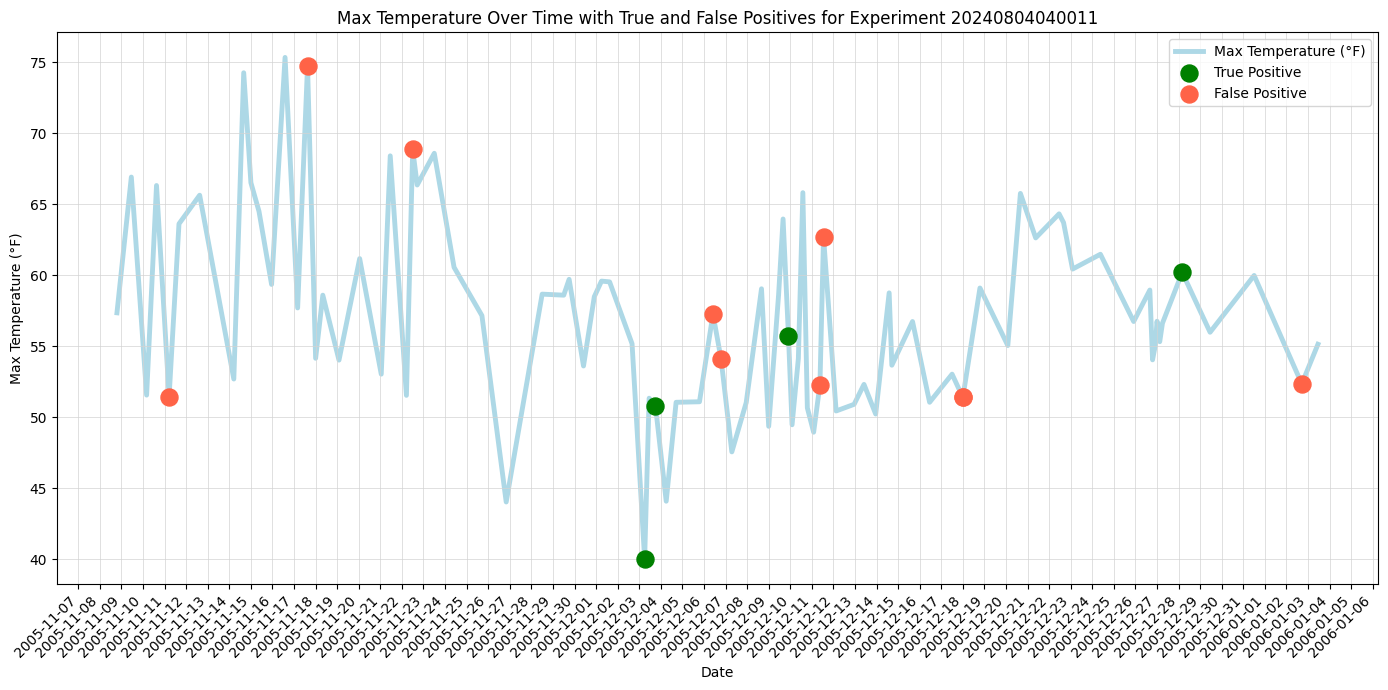

In [9]:
import pandas as pd
import matplotlib.pyplot as plt
import matplotlib.dates as mdates

# Load the Parquet file for weather data
parquet_file_path_weather = '/home/ubuntu/efs-w210-capstone-ebs/00.GabbleGrid/04.Local_Other_Files/20240803_Historical_Weather_94550/openweathermap_livermore.parquet'
df_weather_parquet = pd.read_parquet(parquet_file_path_weather)

# Load the Parquet file for experiment data
file_path = '/home/ubuntu/efs-w210-capstone-ebs/00.GabbleGrid/project/admin/01.Templates/A-Template_Detail.parquet'
df_experiment = pd.read_parquet(file_path)

# Filter for the specific experiment
experiment_id = 20240804040011
df_experiment_filtered = df_experiment[df_experiment['Experiment'] == experiment_id].copy()

# Focus on the relevant columns
df_experiment_filtered = df_experiment_filtered[['Sample_Start_Time', 'Sample', 'Predicted', 'Actual']]

# Convert Sample_Start_Time to datetime
df_experiment_filtered['Sample_Start_Time'] = pd.to_datetime(df_experiment_filtered['Sample_Start_Time'])

# Ensure 'Predicted' and 'Actual' columns are integers
df_experiment_filtered['Predicted'] = df_experiment_filtered['Predicted'].astype(int)
df_experiment_filtered['Actual'] = df_experiment_filtered['Actual'].astype(int)

# Create a new column for categorizing TP and FP
df_experiment_filtered['Category'] = 'Other'
df_experiment_filtered.loc[(df_experiment_filtered['Predicted'] == 1) & (df_experiment_filtered['Actual'] == 1), 'Category'] = 'True Positive'
df_experiment_filtered.loc[(df_experiment_filtered['Predicted'] == 1) & (df_experiment_filtered['Actual'] == 0), 'Category'] = 'False Positive'

# Round Sample_Start_Time to the nearest hour
df_experiment_filtered['Sample_Start_Time_Hour'] = df_experiment_filtered['Sample_Start_Time'].dt.round('h')

# Ensure weather data is in the same timezone
df_weather_parquet['gn_dt_pacific'] = pd.to_datetime(df_weather_parquet['gn_dt_pacific'], errors='coerce').dt.tz_localize(None).dt.round('h')

# Print head of both DataFrames before merging
# print("Experiment DataFrame head:")
# # print(df_experiment_filtered.head())
# # print("\nWeather DataFrame head:")
# print(df_weather_parquet.head())

# Merge the weather and experiment data on the date
df_merged = pd.merge(df_weather_parquet, df_experiment_filtered, left_on='gn_dt_pacific', right_on='Sample_Start_Time_Hour', how='inner')

# Check if the merged DataFrame is empty
# print("\nMerged DataFrame head:")
# print(df_merged.head())

# Plotting
if not df_merged.empty:
    plt.figure(figsize=(14, 7))

    # Line plot for temperature with thicker lines
    plt.plot(df_merged['gn_dt_pacific'], df_merged['gn_temp_max'], label='Max Temperature (°F)', color='lightblue', linestyle='-', marker='', linewidth=3.5, zorder=1)

    # Scatter plot for True Positives and False Positives
    categories = ['True Positive', 'False Positive']
    colors = {'True Positive': 'green', 'False Positive': 'tomato'}
    sizes = {'True Positive': 150, 'False Positive': 150}  # Larger sizes for more visibility
    opacities = {'True Positive': 1.0, 'False Positive': 1.0}  # Fully opaque

    for category in categories:
        subset = df_merged[df_merged['Category'] == category]
        plt.scatter(subset['gn_dt_pacific'], subset['gn_temp_max'], label=category, color=colors[category], s=sizes[category], alpha=opacities[category], zorder=2)  # s for size, alpha for opacity

    # Adding titles and labels
    plt.title('Max Temperature Over Time with True and False Positives for Experiment 20240804040011')
    plt.xlabel('Date')
    plt.ylabel('Max Temperature (°F)')
    plt.legend()

    # Setting xticks for each day
    plt.gca().xaxis.set_major_locator(mdates.DayLocator())
    plt.gca().xaxis.set_major_formatter(mdates.DateFormatter('%Y-%m-%d'))
    plt.xticks(rotation=45, ha='right')

    # Light and almost invisible grid lines
    plt.grid(True, which='both', color='lightgrey', linestyle='-', linewidth=0.5)

    plt.tight_layout()

    # Show plot
    plt.show()
else:
    print("Merged DataFrame is empty. No data to plot.")
